<a href="https://colab.research.google.com/github/gumballH2Oson/loud-mawt-works/blob/main/neuralmodel_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

usedcars = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/usedcars.csv')
usedcars.head()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO


In [ ]:
cars_one_hot=pd.get_dummies(usedcars)
cars_one_hot.head()

,year,price,mileage,model_SE,model_SEL,model_SES,color_Black,color_Blue,color_Gold,color_Gray,color_Green,color_Red,color_Silver,color_White,color_Yellow,transmission_AUTO,transmission_MANUAL
0,2011,21992,7413,0,1,0,0,0,0,0,0,0,0,0,1,1,0
1,2011,20995,10926,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,2011,19995,7351,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,2011,17809,11613,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,2012,17500,8367,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
X= cars_one_hot.drop('price', axis=1)

y= cars_one_hot['price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X), len(X_train), len(X_test)

(150, 120, 30)

In [ ]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 18ms/step - loss: 13735.3604 - mae: 13735.3604
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 12605.3340 - mae: 12605.3340
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 11493.7324 - mae: 11493.7324
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 10465.0830 - mae: 10465.0820
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 9665.7285 - mae: 9665.7285
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 9005.8418 - mae: 9005.8418
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 8497.9854 - mae: 8497.9854
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 8138.4272 - mae: 8138.4272
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 7972.1001 - mae: 7972.1001
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 7859.1904 - mae: 7859.1904
Epoch 11/1

In [ ]:
tf.random.set_seed(42)

model2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

history=model2.fit(X_train, y_train, epochs=1000, verbose=0)

In [ ]:
#check results
model.evaluate(X_test,y_test)

model2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 137ms/step - loss: 1172.6910 - mae: 1172.6910


[1172.6910400390625, 1172.6910400390625]

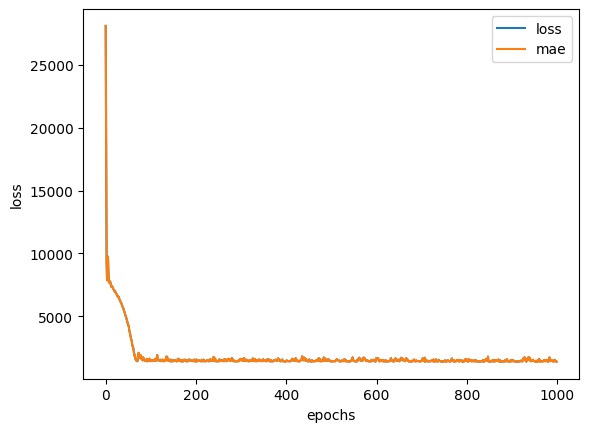

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
concrete= pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/concrete.csv')
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
concrete_one_hot= pd.get_dummies(concrete)
concrete_one_hot.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
X= concrete.drop('strength', axis=1)
y= concrete['strength']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [ ]:
tf.random.set_seed(35)

concrete_model= tf.keras.Sequential(
    tf.keras.layers.Dense(100)

)

concrete_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=['mae']
                       )

concrete_model.fit(X_train, y_train, epochs=1000, verbose=0)

In [ ]:
tf.random.set_seed(35)

concrete_model_2= tf.keras.Sequential(
    tf.keras.layers.Dense(100)
)

concrete_model_2.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=['mae']
                       )

history=concrete_model_2.fit(X_train, y_train, epochs=1000,verbose=0)

him = concrete_model_2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 7.5584 - mae: 7.5584


In [ ]:
tf.random.set_seed(35)

concrete_model_3= tf.keras.Sequential(
    tf.keras.layers.Dense(100)
)

concrete_model_3.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.RMSprop(),
                       metrics=['mae']
                       )

concrete_model_3.fit(X_train, y_train, epochs=1000,verbose=0)

In [ ]:
hit= concrete_model.evaluate(X_test,y_test)



her= concrete_model_3.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 7.7923 - mae: 7.7923


In [ ]:
her,him,hit

([7.792272567749023, 7.792272567749023],
 [7.5587663650512695, 7.5587663650512695],
 [74.41596221923828, 74.41596221923828])

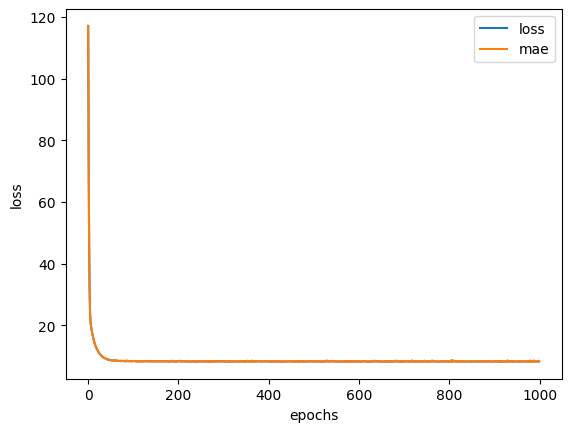

In [ ]:
#him (concrete_model_2) is our best model

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#featere
X= np.array([-70, -63, -56, -49, -42, -35, -28, -21, -14, -7])

#labels
y=np.array([-40, -33, -26, -19, -12, -5, 2, 9, 16, 23])



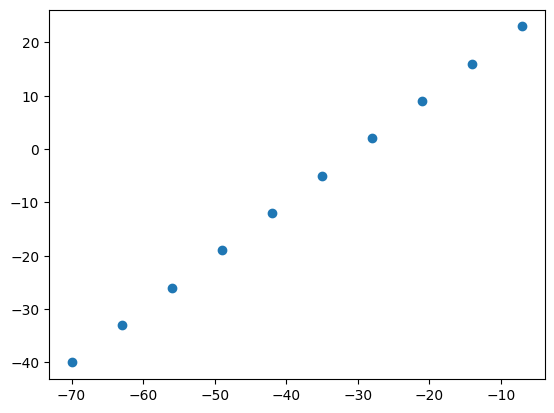

In [ ]:
#visualize
plt.scatter(X,y)

In [ ]:
#turn our arrays to tensors
X= tf.cast(tf.constant(X), dtype=tf.float32)
y =tf.cast(tf.constant(y), dtype=tf.float32)

In [ ]:
X


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-70., -63., -56., -49., -42., -35., -28., -21., -14.,  -7.],
      dtype=float32)>

In [ ]:
tf.random.set_seed(69)

model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
                 optimizer= tf.keras.optimizers.SGD(),
                 metrics='mae')

model.fit(tf.expand_dims(X, axis=1), y, epochs= 10)

Epoch 1/10
1/1 [==============================] - 1s 674ms/step - loss: 71.8313 - mae: 71.8313
Epoch 2/10
1/1 [==============================] - 0s 30ms/step - loss: 58.0608 - mae: 58.0608
Epoch 3/10
1/1 [==============================] - 0s 15ms/step - loss: 45.1385 - mae: 45.1385
Epoch 4/10
1/1 [==============================] - 0s 24ms/step - loss: 33.3700 - mae: 33.3700
Epoch 5/10
1/1 [==============================] - 0s 14ms/step - loss: 22.7559 - mae: 22.7559
Epoch 6/10
1/1 [==============================] - 0s 14ms/step - loss: 14.9459 - mae: 14.9459
Epoch 7/10
1/1 [==============================] - 0s 26ms/step - loss: 12.1858 - mae: 12.1858
Epoch 8/10
1/1 [==============================] - 0s 22ms/step - loss: 11.6004 - mae: 11.6004
Epoch 9/10
1/1 [==============================] - 0s 20ms/step - loss: 11.5939 - mae: 11.5939
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 11.5874 - mae: 11.5874


In [ ]:
tf.random.set_seed(69)

model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                 optimizer= tf.keras.optimizers.SGD(),
                 metrics='mae')

model_2.fit(tf.expand_dims(X, axis=1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 1s 709ms/step - loss: 24.3127 - mae: 24.3127
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 71.0343 - mae: 71.0343
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 27.8776 - mae: 27.8776
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 15.5914 - mae: 15.5914
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 11.5788 - mae: 11.5788
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 11.5678 - mae: 11.5678
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 11.6179 - mae: 11.6179
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 12.3633 - mae: 12.3633
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 14.9334 - mae: 14.9334
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 12.3201 - mae: 12.3201
Epoch 11/100
1/1 [==============================

In [ ]:
y_preds= model.predict([75])
y_preds

1/1 [==============================] - 1s 618ms/step


array([[29.303]], dtype=float32)